# 6. Stats overview

# Concept Check: What is the equation for a line?

# Y=mX+b
## Y -> dependent variable
## X -> independent variable
## m -> slope (relationship between X and Y)
## b -> Y intercept, where Y is 0 in a coordinate place (baseline)

# ALL GLMs are based on this equation 
- Regression
- ANOVA
- rmANOVA
- ANCOVA
- Correlations
- T Test

# Easy enough I think I learned this in like 4th Grade

## Hold Up: We are still talking about 4D data

### Yi -> response at each voxel, the linear combination of one or more predictors
### Xi  -> design matrix of predictors
### $\beta_i$   ->  Model parameters
### $\epsilon_i$   ->  random error between observations and the population

# $Y_i = \beta_0 + \beta_1X_i + \epsilon_i $

# Concept Check: In the equation presented which is b and m?
# $Y_i = \beta_0 + \beta_1X_i + \epsilon_i $

- $Y_i$   What we observe for a single voxel for a single run for a single person RANDOM
- $\beta_0$   Y intercept, what is the value of Y_i at X=0
- $\beta_1$   This is our slope (m)
- $X_i$   This is our independent variable (NOT RANDOM) it is our experiment  
- $e_i $   Random error, how the observation deviates from the mean

# Let's start with a non imaging example to get comfortable

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm
%matplotlib inline
from sklearn import datasets ## imports datasets from scikit-learn
data = sm.datasets.statecrime.load_pandas().data
murder = data['murder']
X = data[['poverty', 'hs_grad']]

X["constant"] = 1
y = murder
model = sm.OLS(y, X)
results = model.fit()
predictions = results.predict(X)

# Print out the statistics
results.summary()

/Users/gracer/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 murder   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     10.31
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           0.000189
Time:                        22:17:47   Log-Likelihood:                -128.73
No. Observations:                  51   AIC:                             263.5
Df Residuals:                      48   BIC:                             269.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
poverty        0.5271      0.211      2.495      0.016       0.102       0.952
hs_grad       -0.1339      0.195     -0.688      0.495      -0.525       0.257
constant       9.2268     19.182      0.481      0.633     -29.342      47.795
==============================================================================
Omnibus:                       69.675   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.152
Skew:                           3.564   Prob(JB):                    6.89e-157
Kurtosis:                      19.960   Cond. No.                     3.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Concept check: Which is which?
- ## $Y_i$ 
- ## $\beta_0$ 
- ## $\beta_1$ 
- ## $\beta_2$
- ## $X_1$
- ## $X_2$

- ## $Y_i$    -> murder
- ## $\beta_0$   -> 9.2268	
- ## $\beta_1$   -> -0.1339
- ## $\beta_2$   -> 0.5271
- ## $X_1$   -> poverty
- ## $X_2$   -> hs_grad

Text(0.5, 1.0, 'Linear Regression of Poverty related to murder controlling for education (high school)')

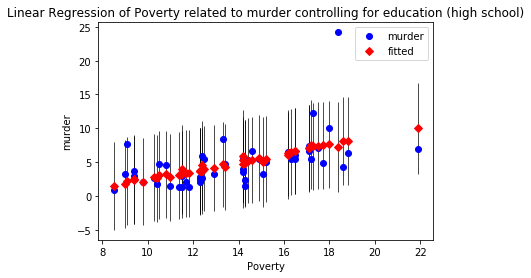

In [3]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("murder")
ax.set_xlabel("Poverty")
ax.set_title("Linear Regression of Poverty related to murder controlling for education (high school)")
# The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

# Wait what about $\epsilon_i $   ???

# $\epsilon_i $   is the error between our observation and the _true_ (unknowable) population value

Great! So if this is essentially unknowable what are we doing here?

# We can at least measure the error of our fitted values (modeled) and the observed values (data points) aka RESIDUALS

## So our data points are from a sample which we assume is from the population of interest.
## We also assume our sample is represenatative of the population of interest.

# Concept Check: What is an example in which a sample is not representative of the population?

## There are probably thousands of examples. One off the top of my head would be measuring PMS symptoms in college aged men. 

This is a real problem though! Think about marginalized groups in research. If we don't equally and randomly sample them then our model is not representative of them, and our conclusions may be invalid.

# Residuals and sample size

So we can never know the true value of the population. Unfortunate. BUT! As our sample size gets bigger we are closer to the true population value! Therefore, if our sample size is large enough our residuals will be more representative of $e_i$

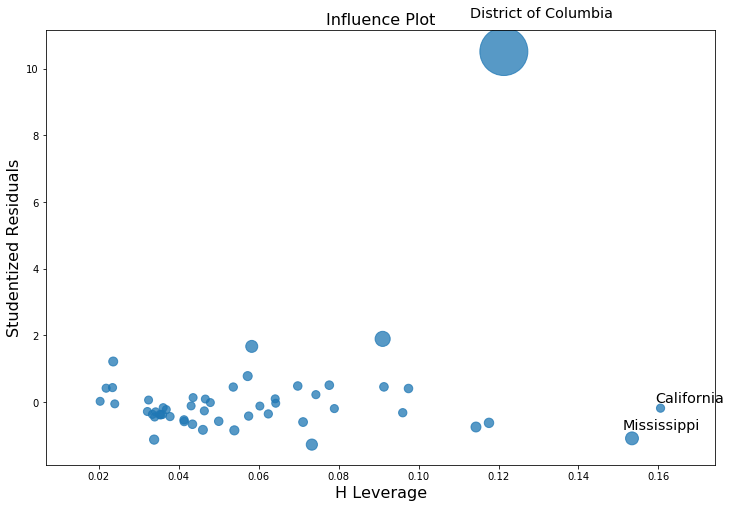

In [4]:
# Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

# Concept check: Looking at the above graph: How good is our model (the effect of poverty and high school education) at predicting the murder rate in DC?

# Not great... compared to the other data points. In fact, it is influencing the overall model. We should probably model DC seperately 

In [39]:
sm.regression.linear_model.RegressionResults.resid(results)

array([-0.36111661,  1.46445599, -1.15286553, -1.80622646, -0.5223856 ,
       -0.8724741 ,  0.67877653,  1.38015334, 16.93380001, -0.16220289,
       -0.69302559, -0.80739383, -3.43093724,  3.72845975,  0.07538936,
       -2.03199012,  0.41750729, -3.79450712,  4.95769621, -1.63571552,
        5.483369  , -0.04209436,  0.30058102, -1.27641872, -3.10806531,
        1.29673659, -1.83136135, -1.18926226,  1.36821025, -0.58536535,
        1.21813631,  2.36902484, -1.37353151, -1.13405271, -1.33282379,
       -0.51244834,  0.19268726, -2.53723044,  1.35096458, -0.95027864,
       -0.34946406, -1.07742389,  0.28360251, -2.19748448, -1.7872376 ,
       -1.75420442,  1.53119907, -0.90264895, -2.57283596, -1.14197533,
       -0.10370183])

# Fixed effects or Random effects
## AKA. Hipsters on fixed gears Vs. Manic Pixie Dream Girls

# $Y_i = \beta_0 + \beta_1X_i + \epsilon_i $

## RANDOM: $ \epsilon_i $

Like many manic pixie dream girls, we can make some assumptions about $ e_i $  
- It has an population mean of 0 (normally distrubuted; aka secretly a normie) 
- The variance (what makes it so manic) is actually the same as the population variance $ \sigma^2 $
- The covariance of the error is 0 (there is no relationship between the manic pixie dream girls, they just happen to be very similar)

![mpdg](https://www.worshipthefandom.com/images/fc_thecoolgirl/image1.jpg)

## FIXED: $ \beta_0 + \beta_1X_i$
- ## Mean of  $Y_i $   and some error term $e_i$   (not the same as $\epsilon$  )

### $e_i=Y_i-(\hat{\beta}_0+\hat{\beta_1}X_i)$
- The hat = estimated  

### AKA:  fixie hipster is wearing a silly hat
![hat](https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/225ee422480663.563135483ddbd.jpg)

# Concept check: What is another name for $e_i$   that we have used earlier? 

# Residuals

# Ah! So $e_i$   = residuals! And so we can make assumptions about the fixed gear hipster error term too!
## These are for Ordinary Least Squared residuals (there are many ways to model the residual, but this is probably most common)
## Assumptions
- Mean is 0 (normally distributed, aka. also secretely a normie)
- Not correlated (none of these hipsters is related to anyother and they are operating independently aka. no tandem bikes)
- Variance is the same (yeah they all seem weird and unique, but they are just as weird and unique as the population... psh posers) 

# Variance $\sigma^s$
## Can we know just how unique all the fixie hipster are??

## Sum Squared Error = $\sum_{} (Y_i-\hat{Y}_i)^2= \sum{}e_i^2$
- Add up all the residuals and square them
- Measure of the difference between the model we made and the data

## Divide by degrees of freedom to get $\sigma^s$
### $\sigma^s = \frac{\sum_{} (Y_i-\hat{Y}_i)^2= \sum{}e_i^2}{N-2}$
- Where N is the sample size
- 2 is the number of parameters in the model

# Degrees of Freedom
## FREEDOM ISN'T FREE! 
### It depends on your sample size and how many parameters you want to model

The bigger the N the better!   
If you have a small N keep the model parameter estimates small

# Parameter estimates (the meaty bits)
# $Y_i = \hat{\beta}_0 + \hat{\beta}_1X_i + \epsilon_i $

# Concept Check: What does the hat mean?

# This is an estimate! 

![matrix](https://cdn.onebauer.media/one/empire-images/articles/5cd5741b133d503e3a49a5c9/matrix-reloaded.jpg?quality=50&width=1800&ratio=16-9&resizeStyle=aspectfill&format=jpg)

# Matrix Alegbra
MAT is a matrix, specifically a 4x5

MAT = [ ${x_i}_j$ ]

i= rows
j= columns

In [5]:
import numpy as np
MAT = np.random.rand(4,5)
print(MAT)
print(MAT.shape)

[[0.06987469 0.1188623  0.11817107 0.28786045 0.21742363]
 [0.06325665 0.21144086 0.75652142 0.44501731 0.5390645 ]
 [0.85020108 0.66018293 0.66564518 0.17337818 0.81600448]
 [0.7877584  0.66992699 0.6847886  0.77378005 0.47868699]]
(4, 5)


# Square Matrix
rows = columns

In [6]:
MATsq = np.random.rand(5,5)
print(MATsq)
print(MATsq.shape)

[[0.71381486 0.12882007 0.81432603 0.96788532 0.4072345 ]
 [0.485592   0.58742811 0.39911639 0.71194099 0.06693899]
 [0.86982159 0.65001588 0.93894149 0.82477753 0.12404943]
 [0.25509975 0.8587652  0.1707235  0.609563   0.7605714 ]
 [0.79226535 0.15451447 0.46639307 0.03589523 0.81990279]]
(5, 5)


# Vector is a column or a row

In [7]:
V3i=MATsq[2]
print(V3i) #this is the 3rd row, weird python thing it starts counting at 0
Vi3=MATsq[:,2]
print(Vi3) #this is the 3rd column, the : just means all rows

[0.86982159 0.65001588 0.93894149 0.82477753 0.12404943]
[0.81432603 0.39911639 0.93894149 0.1707235  0.46639307]


# Special Matrices

## Diagonal
## Identity 

# Special Matrices

## Diagonal
- All entries off the diagonal are 0
- All identity matrices are diagonal, not all diagonal are identity matrices though
- These matrices are important when calculating eigenvalues
- These also are important for linear transformations in two-dimensional space

## Reflection on the X axis
![ref](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/reflectionX.png?raw=true)

## Rotation 90 degrees
![rot90](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/rotation90.png?raw=true)

## Scaling by 2
![scale](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/scaling.png?raw=true)

_images from wikipedia https://en.wikipedia.org/wiki/Linear_map_

# Special Matrices

## Diagonal
## Identity 
   - Only has 1s on the diagonal and 0 everywhere else
   - If an identity matrix is the product of two square matrices, the matrices are inverse of one another
   - When A is m×n, it is a property of matrix multiplication that:
   $I_mA = AI_n =A$

In [8]:
# Diagonal
x = np.arange(25).reshape((5,5))
print('this is our non-diagonal matrix')
print(x)
print('this is our diagonal matrix')
print(np.diag(np.diag(x)))


this is our non-diagonal matrix
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
this is our diagonal matrix
[[ 0  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 24]]


In [9]:
# Identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Matrix Multiplication AxB
## Columns in matrix A must be equal to the number of rows in B

# Concept check: I have a matrix Z [5x8] and matrix Q [5x5]. Can I multiply these?

# NO

Z rows = 5
## Z columns = 8

## Q rows = 5
Q columns = 5

In [25]:
Z = np.arange(40).reshape((5,8))
print(Z)
print('\n')
Q = np.arange(25).reshape((5,5))
print(Q)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [30]:
Gb = np.matmul(Z,Q)

ValueError: shapes (5,8) and (5,5) not aligned: 8 (dim 1) != 5 (dim 0)

In [31]:
Gg = np.matmul(Q,Z)
Gg

array([[ 240,  250,  260,  270,  280,  290,  300,  310],
       [ 640,  675,  710,  745,  780,  815,  850,  885],
       [1040, 1100, 1160, 1220, 1280, 1340, 1400, 1460],
       [1440, 1525, 1610, 1695, 1780, 1865, 1950, 2035],
       [1840, 1950, 2060, 2170, 2280, 2390, 2500, 2610]])

In [44]:
A=np.arange(6).reshape((2,3))
print(A)
print('\n')
B=np.arange(9).reshape((3,3))
print(B)
print('\n')
C = np.matmul(A,B)
print(C)

[[0 1 2]
 [3 4 5]]


[[0 1 2]
 [3 4 5]
 [6 7 8]]


[[15 18 21]
 [42 54 66]]


# Concept Check: How many rows and columns will be in matrix C after we multiple AxB

| Matrix | Rows| Columns|
| -------|-----| -------|
| A      | 2   |   3    |
| B      | 3   |   3    |
| C      |     |        |

| Matrix | Rows | Columns|
| -------|----- | -------|
| A      | 2    | ~~3~~  |
| B      | ~~3~~|   3    |
| C      |      |        |

| Matrix | Rows | Columns|
| -------|----- | -------|
| A      | 2    | ~~3~~  |
| B      | ~~3~~|   3    |
| C      |   2  |   3    |

In [10]:
C = np.matmul(A,B)
A0j=A[0]
print(A0j) #first row
Bi0=B[:,0]
print(Bi0) #first column


A00=A[0][0]
print(A00)
B00=B[0,0]
print(B00)
print('\n')

A01=A[0][1]
print(A01)
B10=B[1,0]
print(B10)
print('\n')
A02=A[0][2]
print(A02)
B20=B[2,0]
print(B20)
print('\n')
C00=(A00*B00)+(A01*B10)+(A02*B20)
print(C00)
print('\n')
print(C)

NameError: name 'A' is not defined

# This is A LOT easier with computers! 
## Remeber that unlike normal multiplication 
## MATRIX MULTIPLICATION IS NOT REVERSIBLE
### AxB != BxA

# Transposing a matrix
## Make the rows columns or vice versa

In [57]:
M=np.arange(10).reshape(2,5)
print(M)
print('\n')
Mt=np.transpose(M)
print(Mt)

[[0 1 2 3 4]
 [5 6 7 8 9]]


[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


# Matrix Inverse 
## NOT transponse (I used to confuse this all the time)
## NOT 1/Matrix
- Only for square matrices
- Only if the matrix is 'full rank'
 - All columns (rows) are linearly independent (not multiples of each other or addition)

In [59]:
Msq=np.arange(25).reshape(5,5)
print(Msq)
print('\n')
Minv=np.linalg.inv(Msq)
print(Minv)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]




LinAlgError: Singular matrix

# Concept check: Why didn't that work?

# The rows and columns can be derived from each other by adding 5 per row to each column wise element
## Not full rank aka rank deficient 

In [68]:
Msq=np.random.randint(25, size=(5, 5))
print(Msq)
print('\n')
Minv=np.linalg.inv(Msq)
print(Minv)

[[ 4 24 13 23  3]
 [ 4  5 21  7 14]
 [ 6  2 17  3 18]
 [11 21  8 22  1]
 [ 3 21 11 18  4]]


[[-0.34385398  0.10400949 -0.07979442  0.16383883  0.21197246]
 [-0.4902975   0.08727309 -0.10908312  0.05923632  0.53833229]
 [-0.24139294  0.22258096 -0.17741245  0.05254835  0.18723026]
 [ 0.71508582 -0.20623991  0.19813527 -0.10789708 -0.67910915]
 [ 0.27789675 -0.22020888  0.2288077  -0.09284091 -0.1941159 ]]


# Inverting a rectangular matrix
- Columns _only_ are linearly independent, then the matrix X transposed matrix is invertible $(A'A)$
    - Useful to examine if a system of linear equations has a solution(s)
- Pseudoinverse: $(A'A)^{-1}A'$
    - Used to calculate least squares
    - Used to calculate Euclidian distance
- $(A'A)^{-1}A'A=I$
    - Gasp the identity matrix!
    - The pseudoinverse times the matrix is the identity matrix :O

# So that was some weird fun math. How is this related to brains?
## $Y_1 = \beta_0 + \beta_1X_11 +\beta_2X_21+ \epsilon_1 $
## $Y_2 = \beta_0 + \beta_1X_12 +\beta_2X_22+ \epsilon_2 $
.
.
.
## $Y_n = \beta_0 + \beta_1X_1n +\beta_2X_2n+ \epsilon_n $

 $\begin{bmatrix}Y_1\\Y_2\\.\\.\\.\\Y_n\end{bmatrix} = \begin{bmatrix}1 & X_11 & X_12 \\1 & X_21 & X_22\\.\\.\\.\\1 & X_n1 & X_n2\end{bmatrix} \begin{bmatrix}\beta_0\\ {\beta_1}\\{\beta_3}\end{bmatrix}+\begin{bmatrix}\epsilon_1\\{\epsilon_2}\\.\\.\\.\\{\epsilon_n}\end{bmatrix}$
 
 
 
 
 
 
 

# So that was some weird fun math. How is this related to brains?
## $Y_1 = \beta_0 + \beta_1X_{11} +\beta_2X_{12}+ \epsilon_1 $
## $Y_2 = \beta_0 + \beta_1X_{21} +\beta_2X_{22}+ \epsilon_2 $
.
.
.
## $Y_n = \beta_0 + \beta_1X_{n1} +\beta_2X_{n2}+ \epsilon_n $

 $\begin{bmatrix}Y_1\\Y_2\\.\\.\\.\\Y_n\end{bmatrix} = \begin{bmatrix}1 & X_{11} & X_{12} \\1 & X_{21} & X_{22}\\.\\.\\.\\1 & X_{n1} & X_{n2}\end{bmatrix} \begin{bmatrix}\beta_0\\ {\beta_1}\\{\beta_2}\end{bmatrix}+\begin{bmatrix}\epsilon_1\\{\epsilon_2}\\.\\.\\.\\{\epsilon_n}\end{bmatrix}$

$Y_{mat} = X_{mat}\beta_{mat}+\epsilon_{mat}$





# 8. First level stats
## - Confounds
## - Modeling


# OK we now know enough to make our first level model
- Open the full model set up in the stats window
- EVs are our independent variables 
- Click custom (3 column format)

| onset  | duration of stimuli | Parametic modulator|
|:------:|:-------------------:| :-----------------:|
| 1      | 2                   | 1                  |
| 2      | 2                   | 1                  |
| 3      | 2                   | 1                  |

- Convolution = Double-Gamma HRF 
    -- Will go over why this one in a minute but we need to get these models going
- Turn off temporal filtering

# About the task
## Double auction
I have no idea what a double auction task is! But there are pictures and responses. So we are going to look at pictures and responses

## EV1 name = Picture
### Filename = /work/data/ds001966-1.0.1/sub-01/func/sub-01_pics.txt
## EV2 name = Response
### Filename = /work/data/ds001966-1.0.1/sub-01/func/sub-01_resp.txt

# Contrasts and F-test
## What are we going to compare? 
## 4 contrasts
### 1. main effects of picture named: picture
### 2. main effects of response named: response
### 3. response > picture named: res > pic
### 4. response < picture named: pic > res



| Title     | EV1 | EV2|
|:--------:|:---:|:--:|
| picture  | 1   | 0  |
| response | 0   | 1  |
| res > pic| 1   | -1 |
| pic > res| -1  | 1  |

In [ ]:
# How I made the EV files
import glob
import os
import pandas as pd
import numpy as np
import pdb
basedir='/Users/gracer/Downloads/ds001966-1.0.1'

sub_dict={}
for item in glob.glob(os.path.join(basedir,'sub-*','func','sub-*_task-doubleauction_events.tsv')):
    sub=item.split('/')[5]
    sub_dict[sub]=item
    
for key, item in sub_dict.items():
    df=pd.read_csv(item,'\t')
    df['onset'] = df['onset'].round(3)
    df['duration'] = df['duration'].round(3)
    pics=df.loc[df['Event Type'] == 'Picture']
    pics['Event Type'].loc[pics['Event Type'] == 'Picture']= 1
    resp=df.loc[df['Event Type'] == 'Response']
    resp['Event Type'].loc[resp['Event Type'] == 'Response']= 1
    savedir=os.path.join(basedir,key,'func')
    resp.to_csv(os.path.join(savedir,'%s_resp.txt'%key), sep=' ', index=False, header=False)
    pics.to_csv(os.path.join(savedir,'%s_pics.txt'%key), sep=' ', index=False, header=False)


# Wrap Up: What have we learned?
## Statistics seems straight forward (line pun!). You have taken the red pill though and entered the world of MATRIX ALGEBRA! LINES ARE SQUARES, EVERYTHING HAS HATS, YOU MAY OR MAY NOT BE ABLE TO DODGE BULLETS!


# What does our first level model look like in matrix algebra?

## $Y_1 = \beta_0 + \beta_1Picture_11 +\beta_2Response_12+\beta_3MotionParameter_13+ \epsilon_1 $
## $Y_1 = \beta_0 + \beta_1Picture_21 +\beta_2Response_22+\beta_3MotionParameter_23+ \epsilon_2 $
.  
.  
.  
## $Y_{695} = \beta_0 + \beta_1Picture_{695,1} +\beta_2Response_{695,2}+ \epsilon_{695} $


 $\begin{bmatrix}Y_1\\Y_2\\.\\.\\.\\Y_n\end{bmatrix} = \begin{bmatrix}1 & Picture_{11} & Response_{12} \\1 & Picture_{21} & Response_{22}\\.\\.\\.\\1 & Picture_{n1} & Response_{n2}\end{bmatrix} \begin{bmatrix}\beta_0\\ {\beta_1}\end{bmatrix}+\begin{bmatrix}\epsilon_1\\{\epsilon_2}\\.\\.\\.\\{\epsilon_n}\end{bmatrix}$

$Y_{mat} = EV_{mat}\beta_{mat}+\epsilon_{mat}$




# Ok one more time with more pictures!
_from https://fsl.fmrib.ox.ac.uk/fslcourse/_

![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/buildmod.png?raw=true)

![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/conv.png?raw=true)


![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/signal.png?raw=true)

![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/fit.png?raw=true)


![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/allvoxels.png?raw=true)



![](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/glm.png?raw=true)



# Concept check: What are our EVs for our experiment? 

# The EVs in our model are pictures and responses. 
- We set the stimuli or measured them at their onset time, and how long they lasted. 
- Then we multipled the instances in time by the HRF
- The GLM is comparing if our model is similar to any voxel activity
- The beta will tell us how much it is related
- Don't forget that beta is the slope! So for every increase in stimuli (pictures) activity you get a voxel response increase!

# Quick note on mean centering
- Makes the y intercept represent the parameter at the MEAN, instead of the parameter at 0
- The slope is unchanged
- We basically just shifted the line from 0 to the mean

In [70]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)

print(X_scaled)                                          


[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [71]:
# Now the data has a mean of 0 
print(X_scaled.mean(axis=0))

# And a standard unit of variance
print(X_scaled.std(axis=0))


[0. 0. 0.]
[1. 1. 1.]


# Hypothesis testing
- Assume the null (H0) is true
- Beta is the parameter you are testing
- If you are me you are testing juice intake
    - H0: βjuice ≤ 0 (juice has no effect on the brain)
    - HA:βjuice >0 (juice has some effect on the brain other than null)


# Contrasts
## FSL calls contrasts COPEs = Contrast Of Parameter Estimates
## The are a linear combination of the PEs

# Concept Check: What is a PE?

# $\beta$    AKA our slope

## [1 0] :   $ COPE_1 = 1 * \hat{\beta_1} + 0*\hat{\beta_2} = \hat{\beta_1} $    
Main effect of EV1

## [1 -1] :   $ COPE_2 = 1 * \hat{\beta_1} + -1*\hat{\beta_2} = \hat{\beta_1}-\hat{\beta_2} $   
Comparison of EV1 > EV2

# Test null hypothesis that $COPE_1=0$

## $t statistics = \frac{COPE_1}{std(COPE_1)}$

![tstat](https://github.com/grace-shearrer/fMRI_bootcamp2019/blob/wildwest/4dock/images/tcon.png?raw=true)

# How can we solve for   $\hat{\beta}$   ?
## $Y = X\hat{\beta}$

# How can we solve for   $\hat{\beta}$   ?
##   $Y = X\hat{\beta}$
##   $X'Y = (X'X)\hat{\beta}$   transpose X to X' so we can multiple it by Y

# How can we solve for $\hat{\beta}$   ?
##   $Y = X\hat{\beta}$
##   $X'Y = (X'X)\hat{\beta}$
##   $(X'X)^{-1}X'Y = \hat{\beta}$   
Take the inverse of (X'X)

# Concept check: What does (X'X) have to be to take an inverse?

# Square
# Full rank (all columns are linearly independent)

# $(X'X)^{-1}X'Y = \hat{\beta}$   
# This is also the same of least squares! 

# Variance
We haven't given variance much time. But it is a super important assumption!

## $\hat{\sigma}^2 = \frac{e'e}{N-p}$
p=parameters
### $ e = Y-X\hat{\beta}= Y-\hat{Y} $
#### This is the difference between the observed value (Y) and the predicted value   ( $\hat{Y}$ )

# Concept Check: Given   $\hat{\sigma}^2 = \frac{e'e}{N-p}$   : What is the 'easiest' way we can decrease out variance?

# N, which is sample size!

# t tests are sooo easy
# $ t = \frac{c\hat{\beta}}{\hat{\alpha^2}c(X'X)^{-1}c'}$

# where c = contrast matrix
Something like c = [1 -1 0]

## SAME AS ABOVE just matrix'd


# So we what do we have?
##  $c\hat{\beta}$   = contrast matrix times betas
##  $\hat{\sigma}^2$   = variance
##  $c(X'X)^{-1}$   = experimental design
##  $c'$   = transposed contrast matrix

# What can we manipulate to improve our t-stat? 
## Mostly the variance term by increasing the N
## We can maximize our experimental design and calculate the efficency 
## We can maintain degrees of freedom in the model c

# No free lunch, or degrees of freedom
Recall we want to keep our sample size much larger than our parameters in our models
###   $\sigma^s$ = $\frac{\sum_{} (Y_i-\hat{Y}_i)^2= \sum{}e_i^2}{N-2}$
- Where N is the sample size
- 2 is the number of parameters in the model

# 7. FILM (FMRIB's Improved Linear Model)
How do they come up with these names???

# FILM frustration
FILM is easily the most confusing and least understood part of FEAT and fMRI analysis in general. According to the FSL website FILM is, "a robust and accurate nonparametric estimation of time series autocorrelation to prewhiten each voxel's time series; this gives improved estimation efficiency compared with methods that do not pre-whiten." 

# Prewhiten? 
When we talk about noise in data (any data not just fMRI) we have 'coloured' and 'white' noises.  
![noise](https://upload.wikimedia.org/wikipedia/commons/6/6c/The_Colors_of_Noise.png)
_image from wikipedia_

## White noise
Is random signal with a flat power spectra. White noise is supposed to be discrete, serially uncorrelated, with a mean of 0 and finite variance. 
![whitenoise](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/White_noise.svg/2560px-White_noise.svg.png)

## Cool, cool... what?
Scientist needed to classify different frequencies of noise so they decided to label them with the same names as similar light (color) frequencies. 

## Why do we care about this noise?
We are taking measurements across time. Therefore, each timepoint is correlated to the other timepoints! Points closer to each other in time are more correlated to each other compared to points far away in time. 
### Thought experiment
Think about the differences between a single person when they are a  2 y old child and a 10 y old child.... They are pretty different right? But now think about when that person is a 10 y old child and a 85 y old adult... Which are more similar? 

# Prewhiten, not just for laundry
So we know we have an underlying correlation in our data. This is 'coloured' noise. We can apply fancy, fancy stats to make this 'coloured' noise white. Thus the word _prewhiten_

You have probably been unknowingly prewhitening data for years and not known! Commonly when modeling repeated measures!

In R when generating a linear mixed model regression (nlme or lme4) you have the option:
```
fm1 <- lme(distance ~ age, data = Orthodont, correlation= corAR1) # random is ~ age
fm2 <- lme(distance ~ age + Sex, data = Orthodont, random = ~ 1, correlation= corAR1)
summary(fm1)
summary(fm2)
```
The correlation flag set the correlation structure of the data. There are quite a few options:
- corAR1 autoregressive process of order 1.
- corARMA autoregressive moving average process, with arbitrary orders for the autoregressive and moving average components.
- corCAR1 continuous autoregressive process (AR(1) process for a continuous time covariate).
- corCompSymm compound symmetry structure corresponding to a constant correlation.
- corExp exponential spatial correlation.
- corGaus Gaussian spatial correlation.
- corLin linear spatial correlation.
- corRatio Rational quadratics spatial correlation.
- corSpher spherical spatial correlation.
- corSymm general correlation matrix, with no additional structure.

# Ok so which one is FILM?
_from https://www.fmrib.ox.ac.uk/datasets/techrep/tr04ss2/tr04ss2/node3.html_
- Applying a Tukey taper to the raw estimates (to smoothly "roll off" higher lags) gave the best results 
- Spatial smoothing of the resulting autocorrelation estimates was found to be important in reducing bias further. 
- The autocorrelation was found to vary considerably between matter types (with higher autocorrelation in the grey matter than in white). 
- Therefore, we apply non-linear spatial smoothing to the autocorrelation coefficients, only smoothing within matter type.

## TL;DR
FILM is pretty special. 
* Not only is it whitening noise due by removing the autocorrelation in the timeseries, it is also reducing bias from the autocorrelation in SPACE. THEY ARE CORRECTING A SPACE-TIME AUTOCORRELATION STRUCTURE! 
* Then they take it a step farther and say, "damn, this is different between the type of SPACE" so they make it non-linear to smooth within SPACE type! 

# END
take a break